<h1><center> Exploratory Data Analysis for Credit Card Fraud Detection

# Table of Contents
### -  [Step 0: Imports and Reading Data](#step0)
### -  [Step 1: Data Understanding](#step1)
### -  [Step 2: Data Preparation](#step2)
### -  [Step 3: Feature Understanding](#step3)
### -  [Step 4: Feature Relationships](#step4)
### -  [Step 5: Conclusion and Insights](#step5)

# Step 0: Imports and Reading Data <a id="step0"><a/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

In [2]:
df=pd.read_csv('train.csv')

# Step 1: Data Understanding  <a id="step1"><a/>


In [3]:
df.shape

(170884, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119191.0,2.052427,-0.133236,-1.740621,0.277935,0.337999,-0.826933,0.334629,-0.227039,0.267655,0.293539,0.427682,0.504109,-0.989043,0.761661,-0.984511,-0.296433,-0.336666,-0.231668,0.544180,-0.269148,-0.006518,0.121300,0.037733,-0.356498,0.147822,0.569149,-0.103929,-0.091958,8.73,0
1,71750.0,1.220356,-0.159191,-0.444349,-0.094437,0.104457,-0.345790,0.170867,-0.094996,0.187572,-0.143353,-0.947576,-0.541060,-0.817426,0.564658,1.276676,0.046158,-0.176105,-0.676223,0.038731,-0.033806,-0.088775,-0.364654,-0.140851,-0.707308,0.415661,1.087767,-0.102532,-0.008335,59.95,0
2,151977.0,0.892824,-1.440698,-0.637940,3.912871,0.099291,2.433288,-0.308891,0.603227,-0.113826,1.057386,-1.317899,-0.768390,-1.081373,0.133451,0.447815,0.575453,-0.158101,-0.903597,-2.798035,0.509795,0.484969,0.487304,-0.122694,-0.598803,-0.594563,0.062841,-0.033426,0.038254,460.65,0
3,55709.0,-3.146021,2.247634,0.901397,0.146162,-2.109360,-0.148312,-1.533191,2.073663,0.499394,-0.363315,-1.072917,0.252020,-1.155591,0.742563,0.338738,0.094420,0.990406,-0.371517,-0.390559,-0.096924,0.050567,-0.037019,0.107000,0.392857,0.303597,0.379544,-0.148990,0.074965,4.78,0
4,66654.0,1.194996,-0.007495,0.301285,0.750199,-0.297494,-0.405836,0.060410,-0.150482,0.400860,-0.228237,-1.002326,0.639557,0.671282,-0.212945,-0.237918,-0.161859,-0.182514,-0.619759,0.389821,0.011447,-0.234931,-0.545566,-0.089418,-0.064036,0.527305,0.294221,-0.025980,0.015637,44.31,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.nunique()

Time       99277
V1        166862
V2        166862
V3        166862
V4        166862
V5        166862
V6        166862
V7        166862
V8        166862
V9        166862
V10       166862
V11       166862
V12       166862
V13       166862
V14       166862
V15       166862
V16       166862
V17       166862
V18       166862
V19       166862
V20       166862
V21       166862
V22       166862
V23       166862
V24       166862
V25       166862
V26       166862
V27       166862
V28       166862
Amount     25361
Class          2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170884 entries, 0 to 170883
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170884 non-null  float64
 1   V1      170884 non-null  float64
 2   V2      170884 non-null  float64
 3   V3      170884 non-null  float64
 4   V4      170884 non-null  float64
 5   V5      170884 non-null  float64
 6   V6      170884 non-null  float64
 7   V7      170884 non-null  float64
 8   V8      170884 non-null  float64
 9   V9      170884 non-null  float64
 10  V10     170884 non-null  float64
 11  V11     170884 non-null  float64
 12  V12     170884 non-null  float64
 13  V13     170884 non-null  float64
 14  V14     170884 non-null  float64
 15  V15     170884 non-null  float64
 16  V16     170884 non-null  float64
 17  V17     170884 non-null  float64
 18  V18     170884 non-null  float64
 19  V19     170884 non-null  float64
 20  V20     170884 non-null  float64
 21  V21     17

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000,170884.000000
mean,94966.107886,-0.001070,-0.000904,-0.002722,-0.002603,0.000151,0.000779,-0.000811,-0.002327,-0.000622,-0.001031,0.000433,0.000659,-0.000806,-0.000532,-0.000266,-0.000419,0.001986,-0.001057,0.000185,-0.001071,0.000957,0.000056,0.000475,-0.000894,-0.000593,-0.000738,0.000404,0.000422,88.511723,0.001785
std,47464.723773,1.958944,1.650481,1.521820,1.416490,1.394123,1.338331,1.260122,1.208709,1.098393,1.085747,1.021278,0.998322,0.994507,0.957929,0.914388,0.879342,0.853936,0.839921,0.814127,0.778423,0.743974,0.726681,0.620647,0.605148,0.521128,0.481720,0.404540,0.314973,256.737144,0.042210
min,0.000000,-46.855047,-63.344698,-48.325589,-5.683171,-113.743307,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.682931,-18.683715,-5.791881,-18.822087,-4.391307,-14.129855,-24.019099,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-7.081325,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54348.000000,-0.922071,-0.599127,-0.896376,-0.848978,-0.691840,-0.768986,-0.554440,-0.209596,-0.642036,-0.537197,-0.763216,-0.403837,-0.649292,-0.426709,-0.582621,-0.468483,-0.484007,-0.500152,-0.454859,-0.211713,-0.228068,-0.542831,-0.161063,-0.354552,-0.318057,-0.327631,-0.070719,-0.053019,5.637500,0.000000
50%,84923.500000,0.016603,0.065839,0.177007,-0.020895,-0.054185,-0.274228,0.040417,0.021461,-0.051777,-0.094376,-0.029338,0.140076,-0.016291,0.050488,0.045489,0.066737,-0.064871,-0.005566,0.003222,-0.062696,-0.029547,0.006488,-0.010688,0.040433,0.016916,-0.051262,0.001520,0.011216,22.020000,0.000000
75%,139404.000000,1.316250,0.802518,1.028302,0.738812,0.612154,0.400359,0.569221,0.326026,0.595095,0.451011,0.741291,0.618087,0.662032,0.492867,0.647375,0.523409,0.403348,0.499790,0.458767,0.133128,0.186681,0.528971,0.147814,0.437888,0.350188,0.240718,0.091713,0.078480,77.650000,0.000000
max,172792.000000,2.451888,22.057729,4.226108,16.875344,34.099309,73.301626,120.589494,18.282168,10.392889,15.331742,11.669205,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,16.129609,25691.160000,1.000000


# Step 2: Data Preperation  <a id="step2"><a/>

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.columns.duplicated().sum()

0

# Step 3: Feature Understanding  <a id="step3"><a/>

### Numerical features 

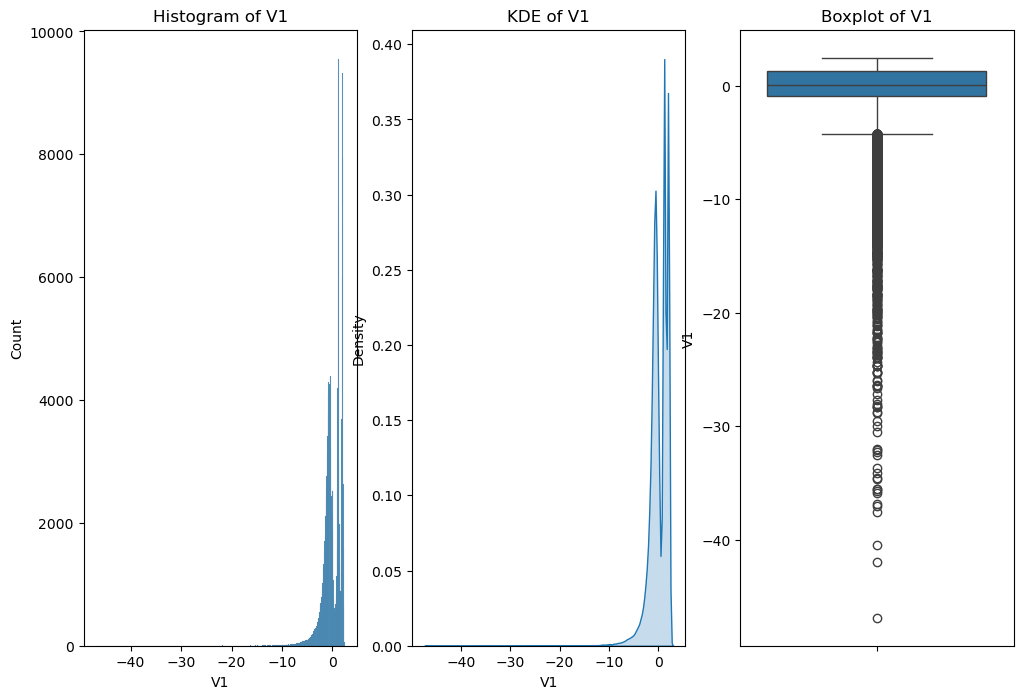

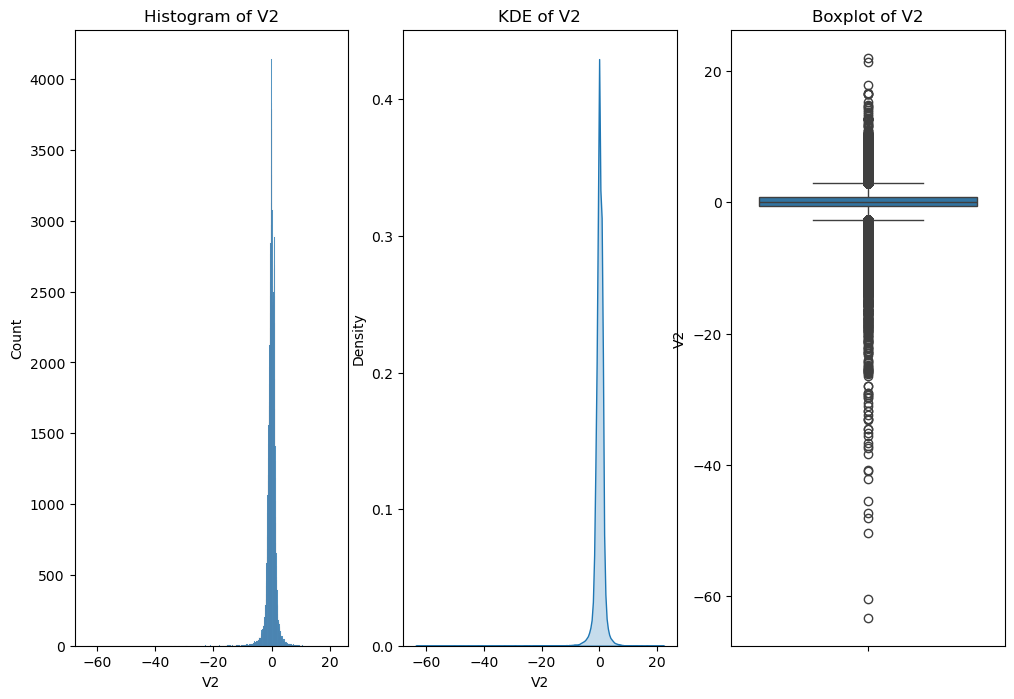

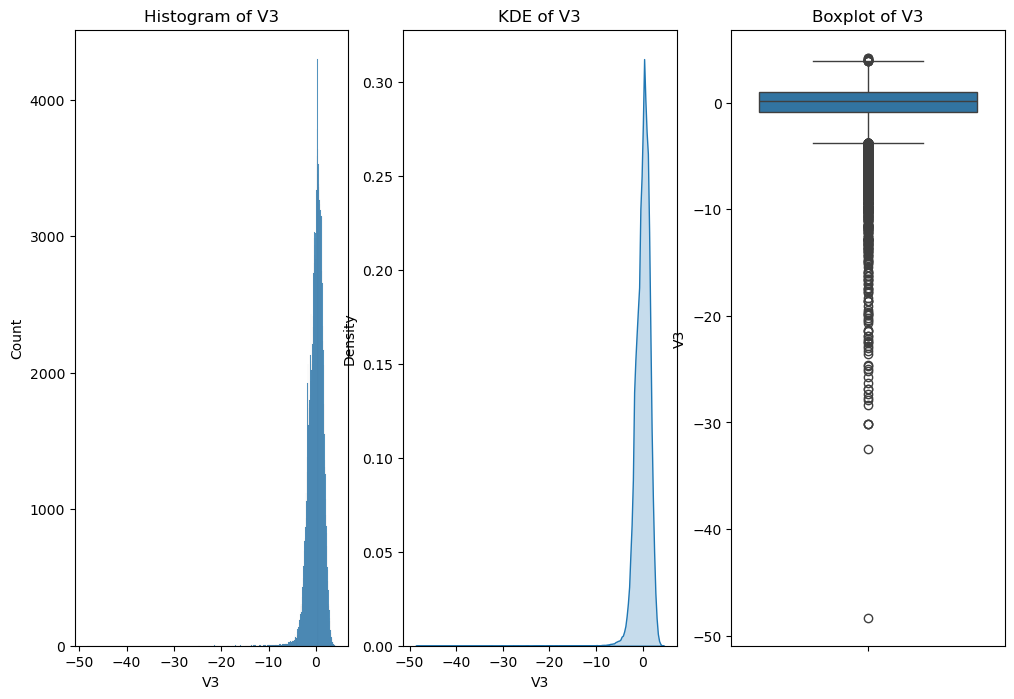

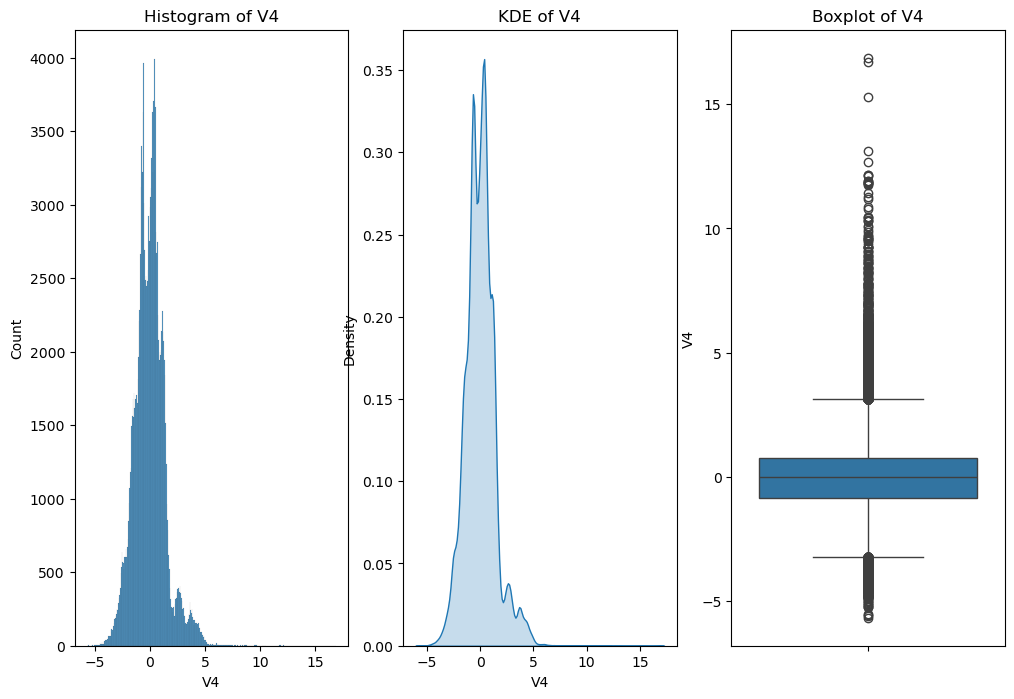

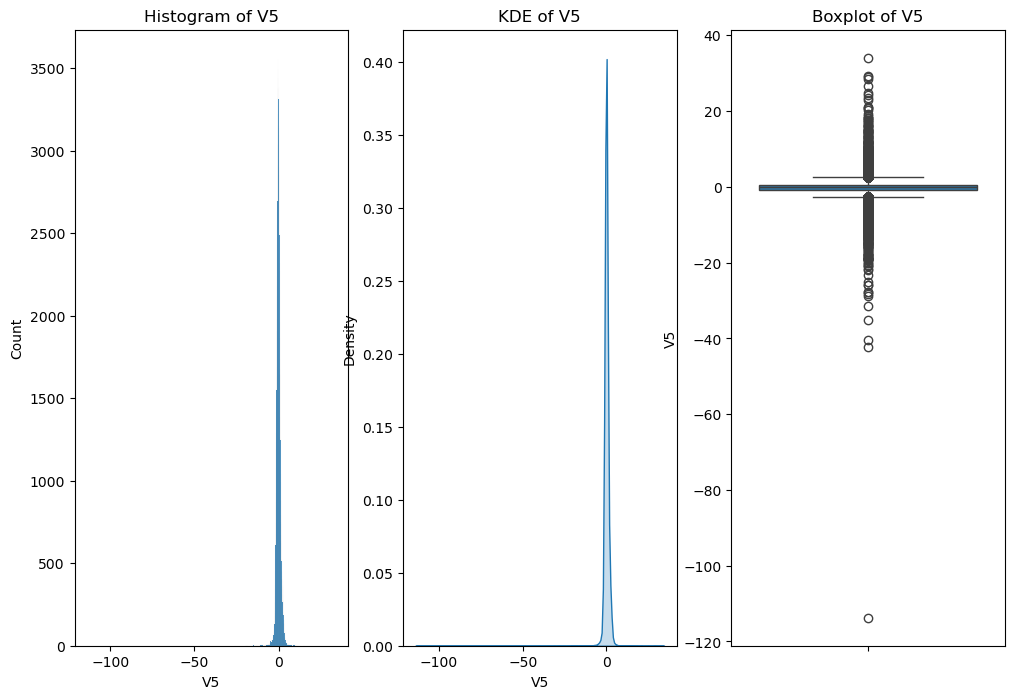

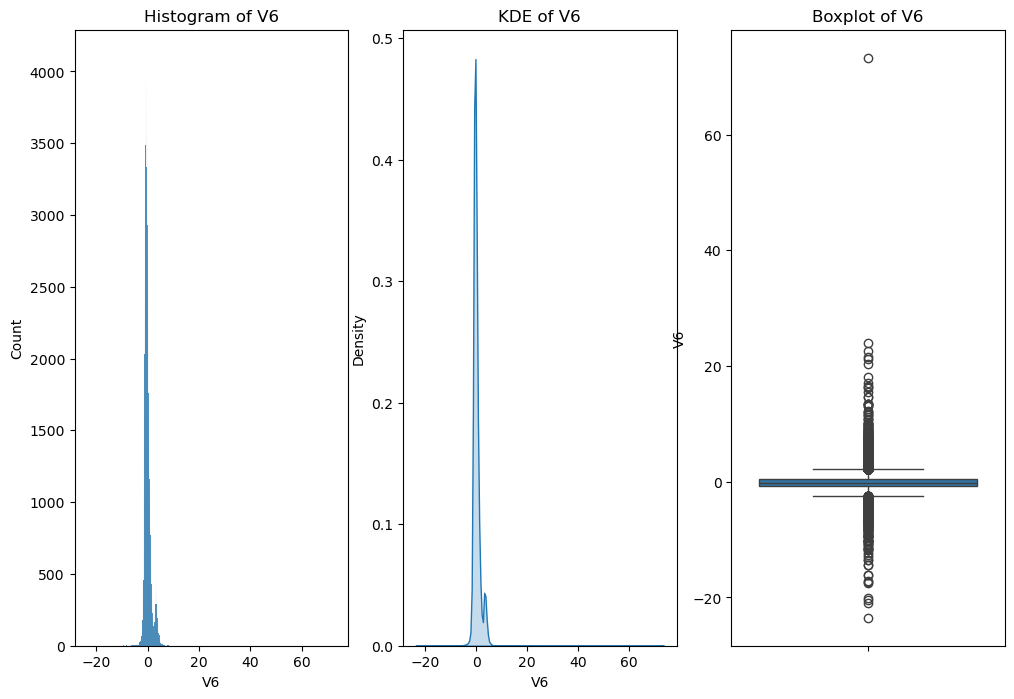

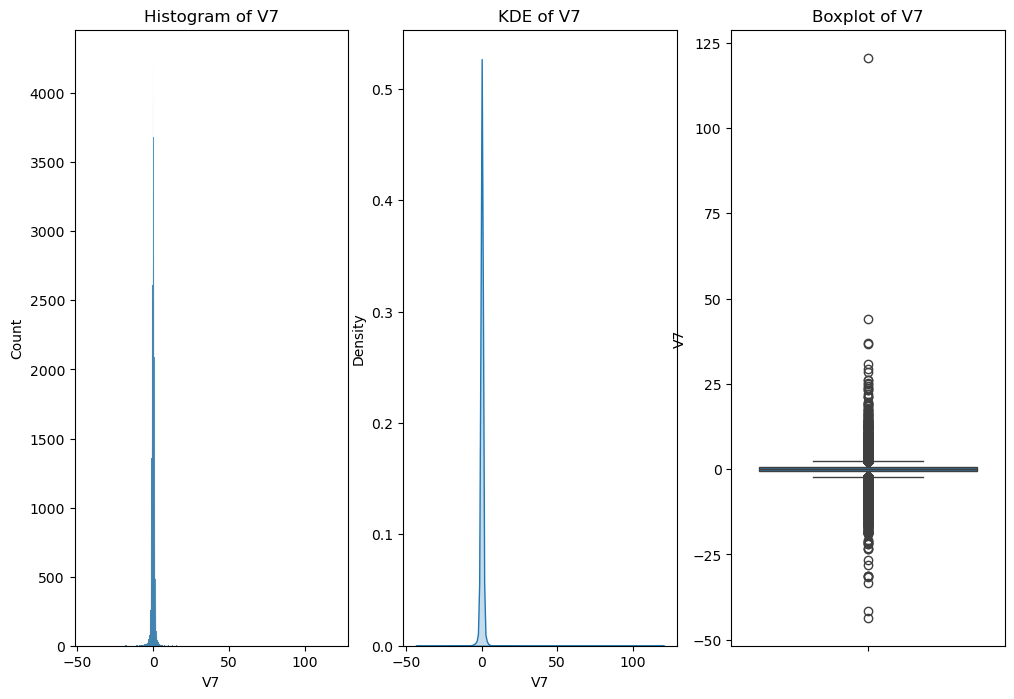

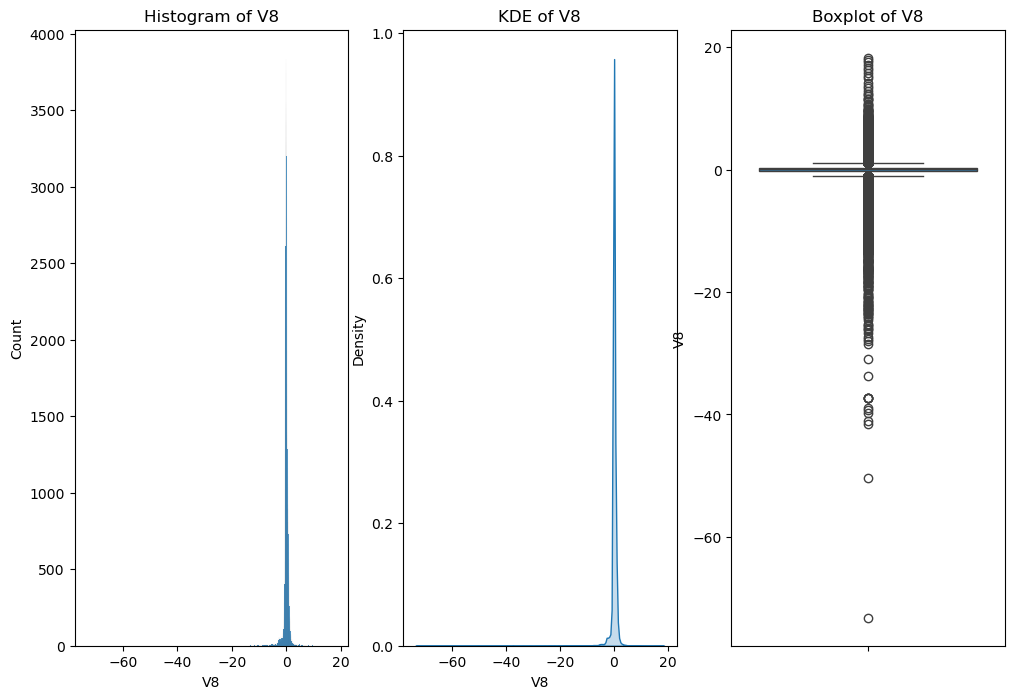

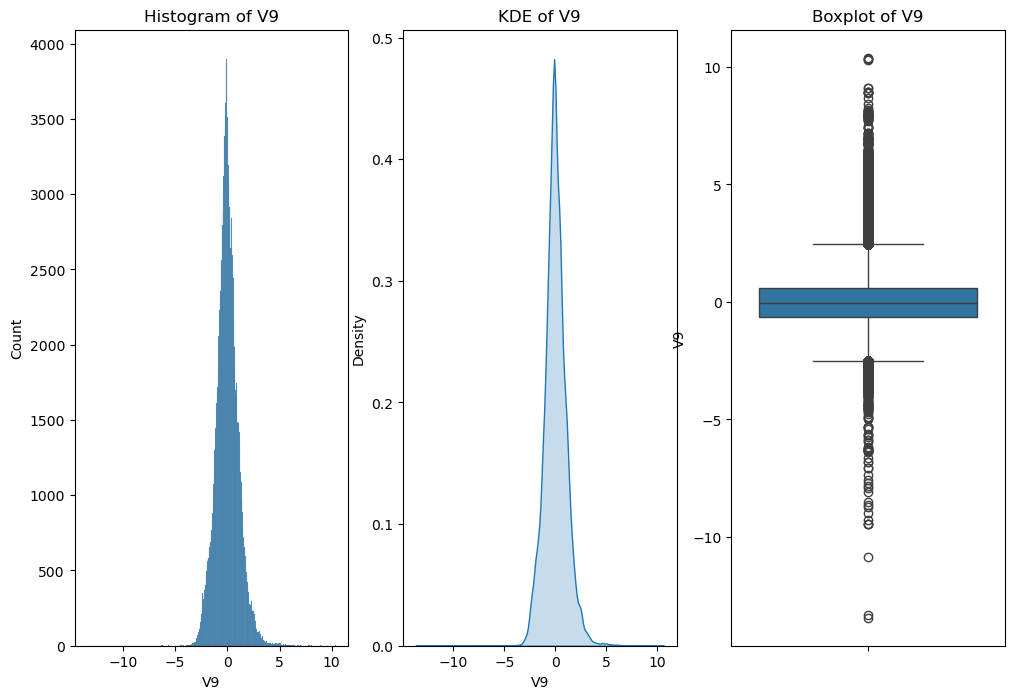

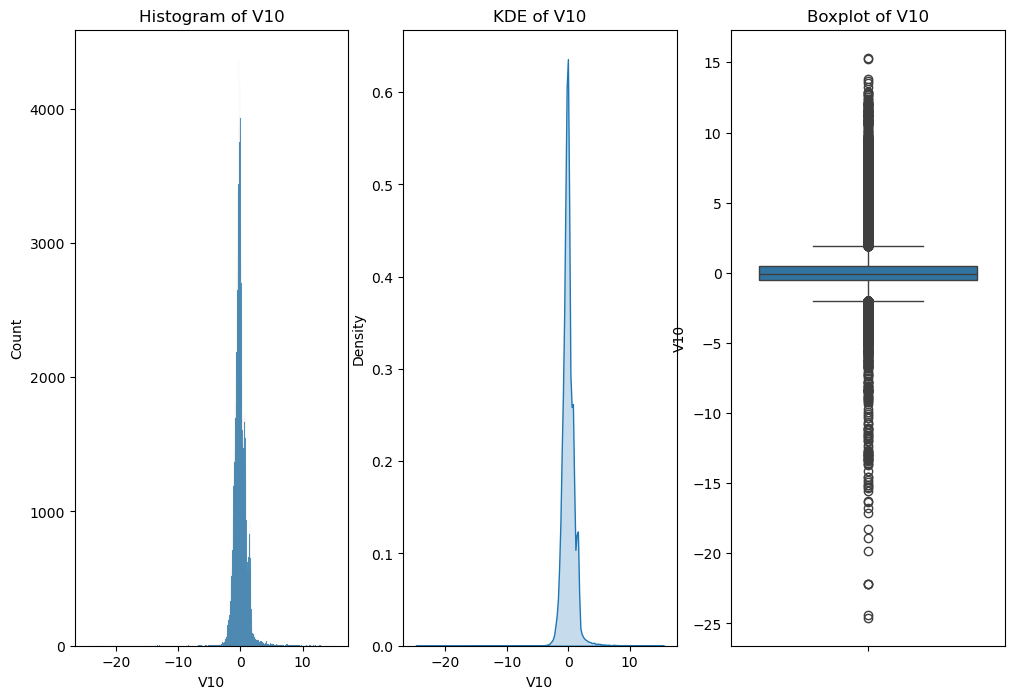

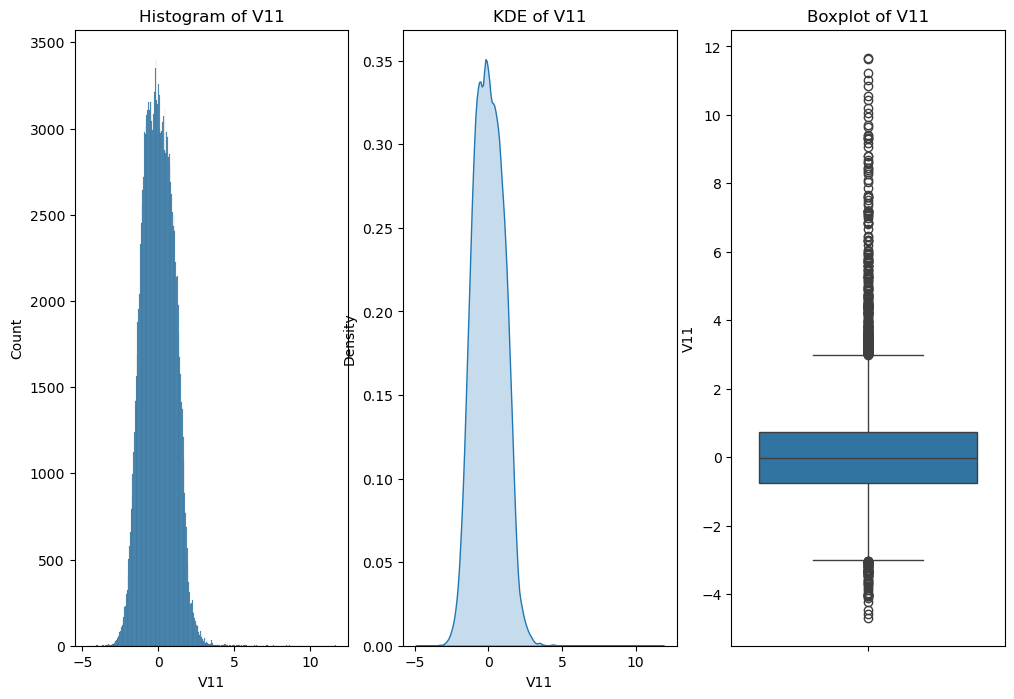

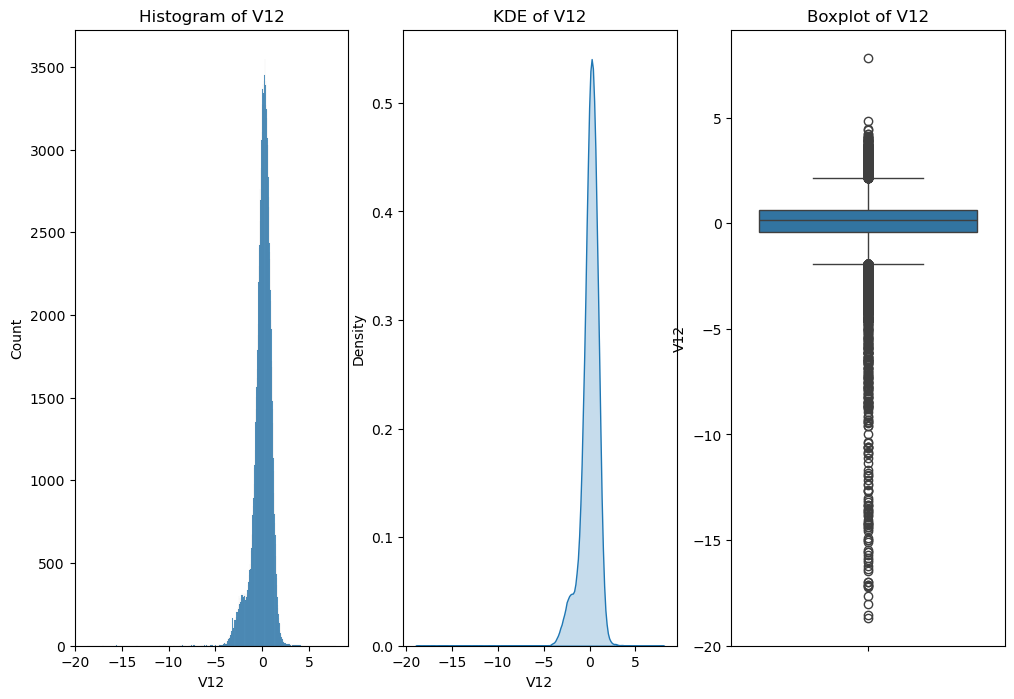

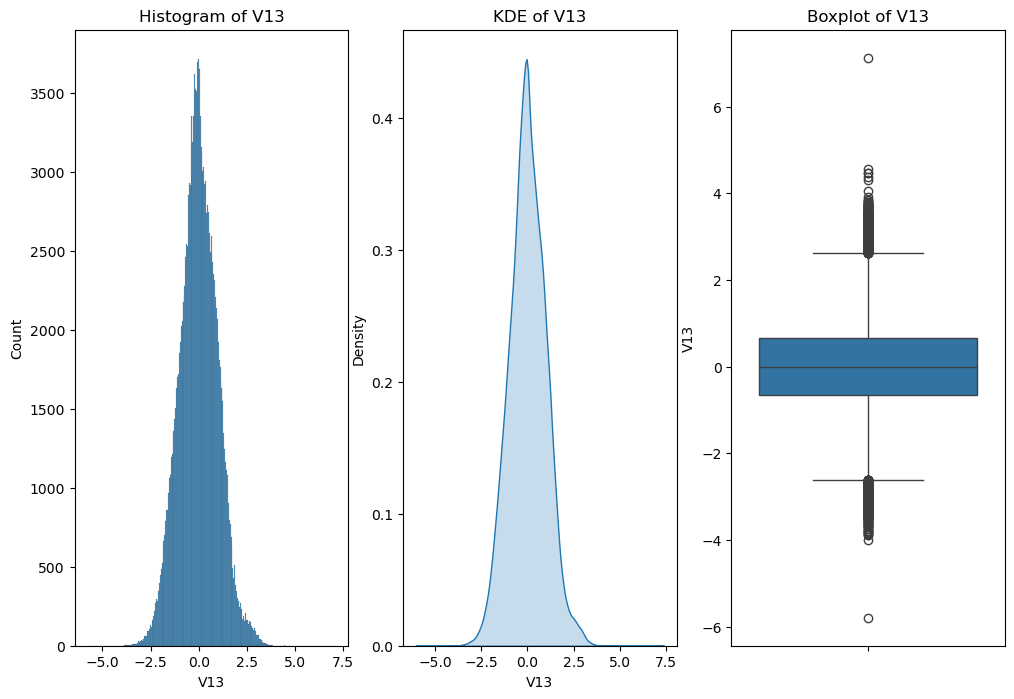

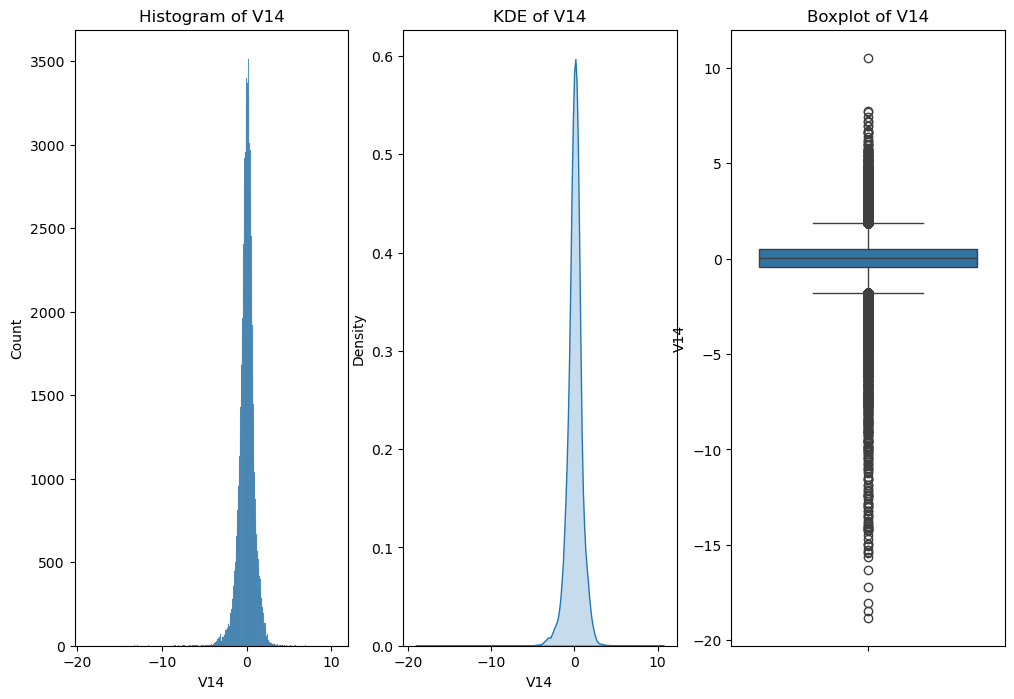

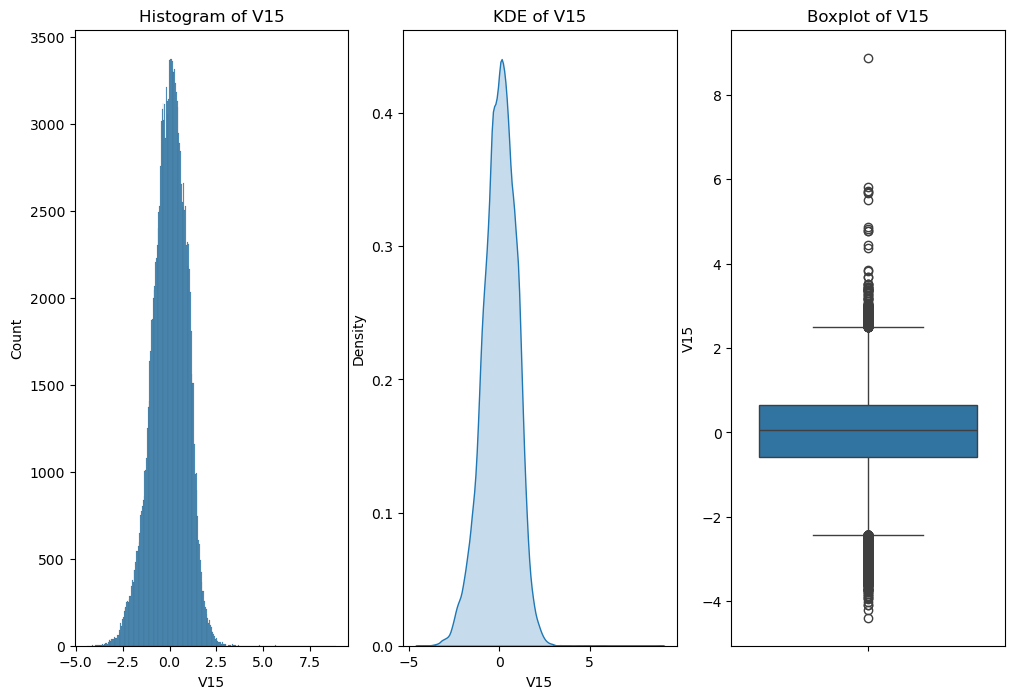

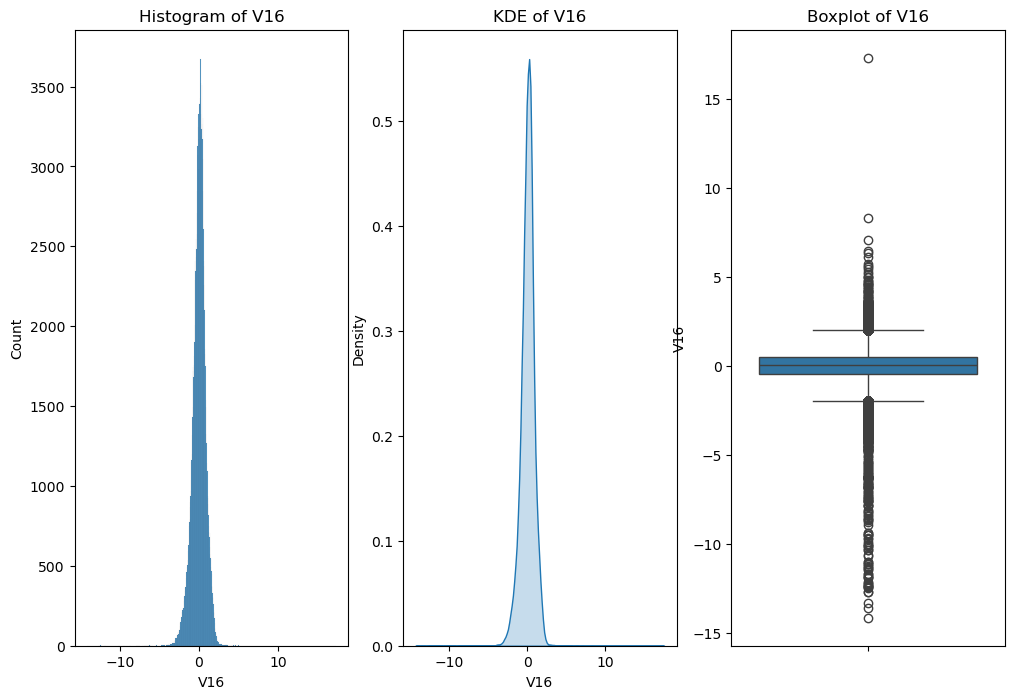

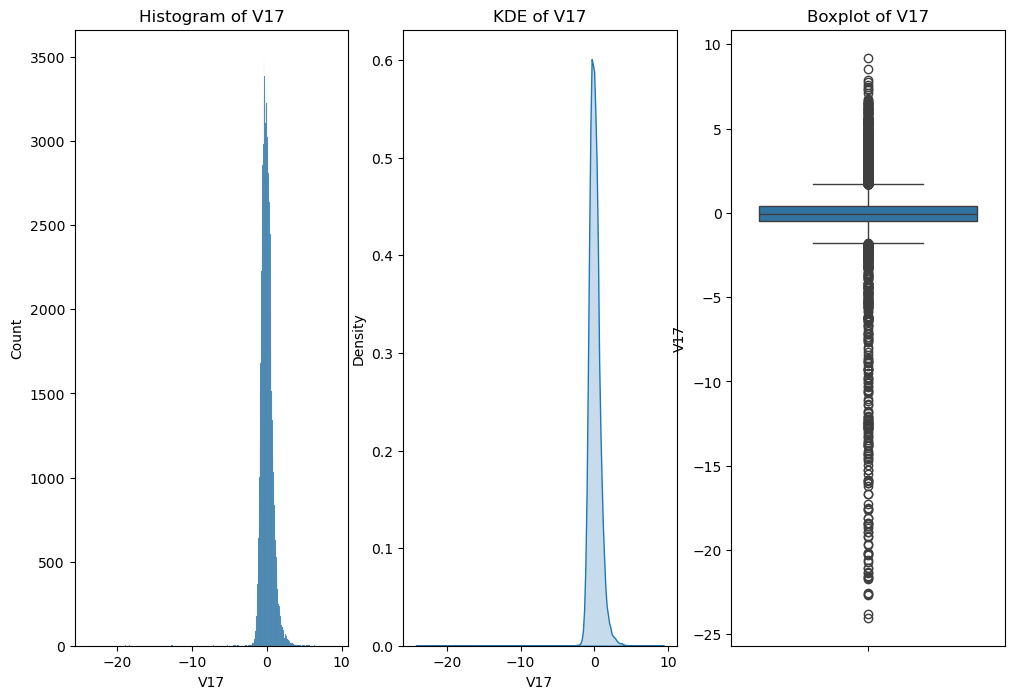

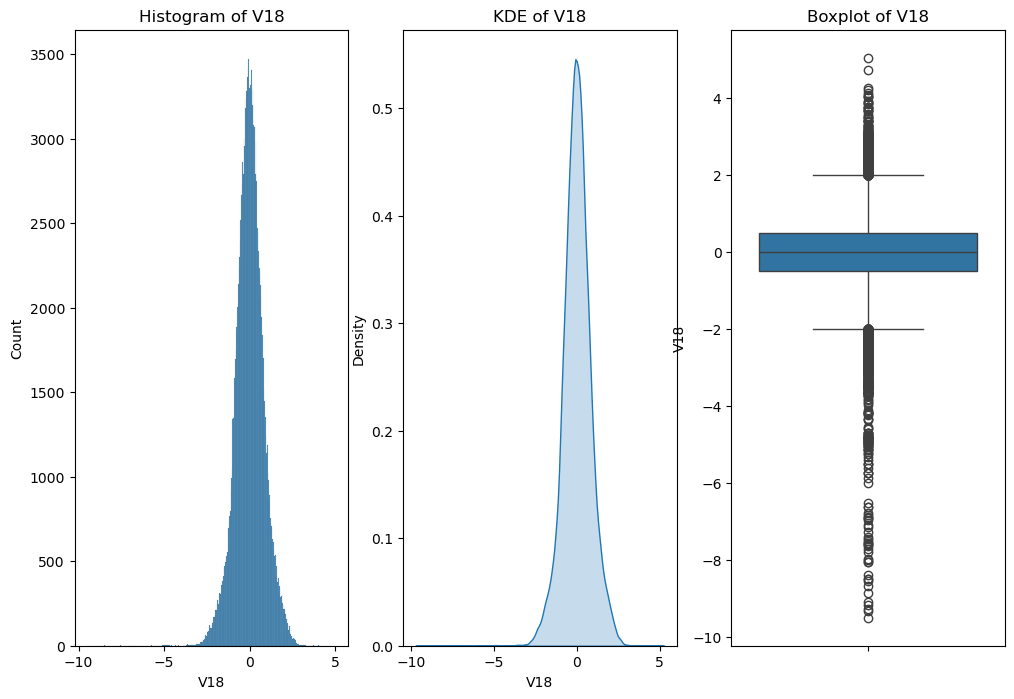

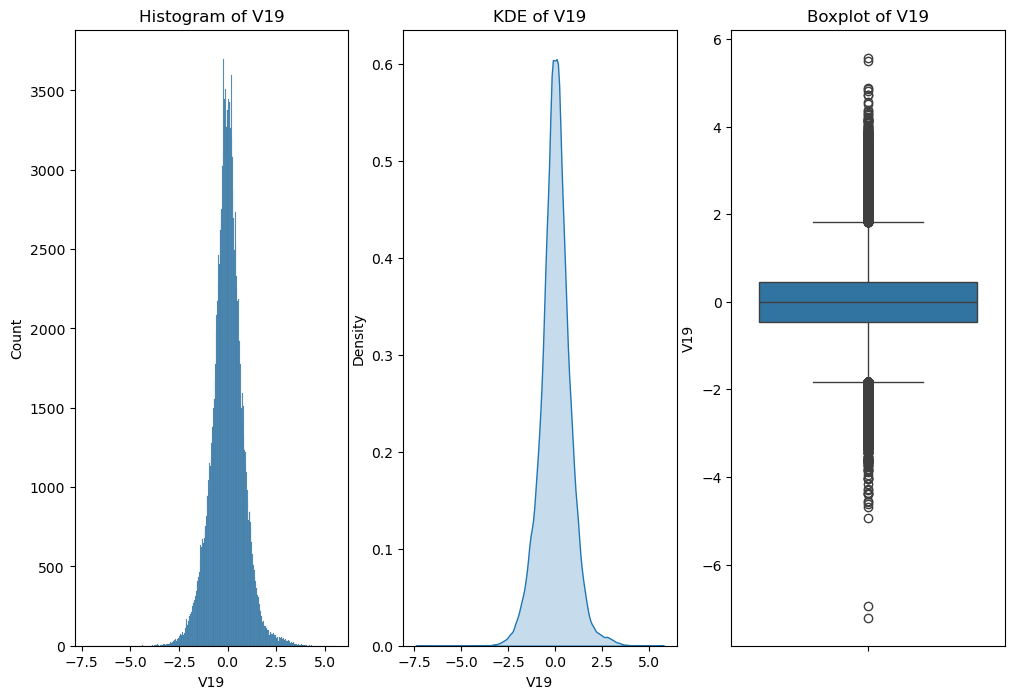

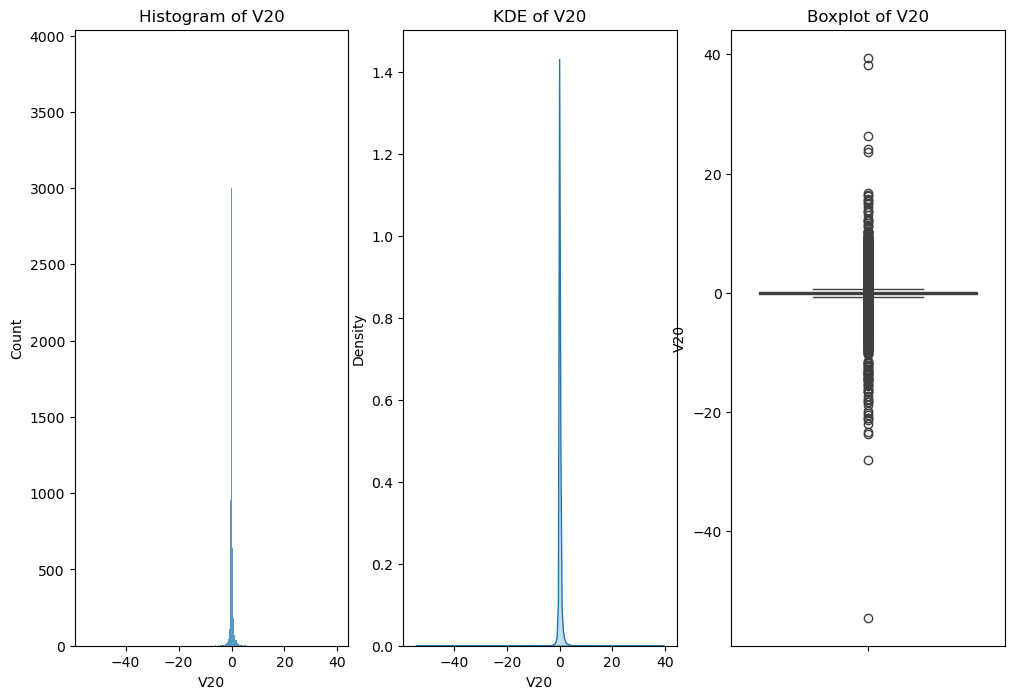

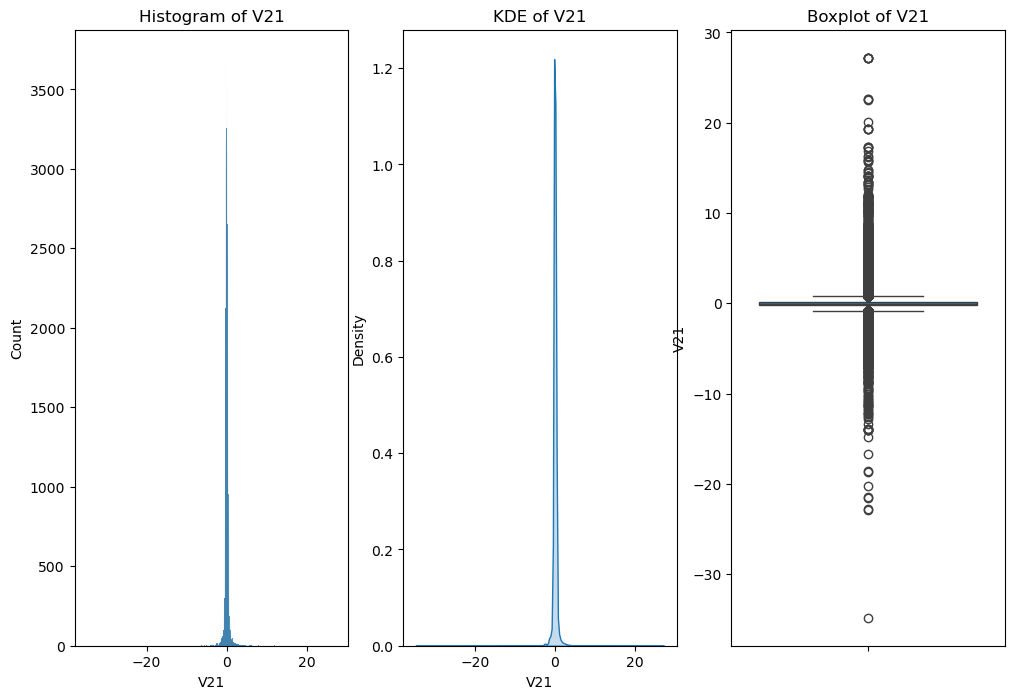

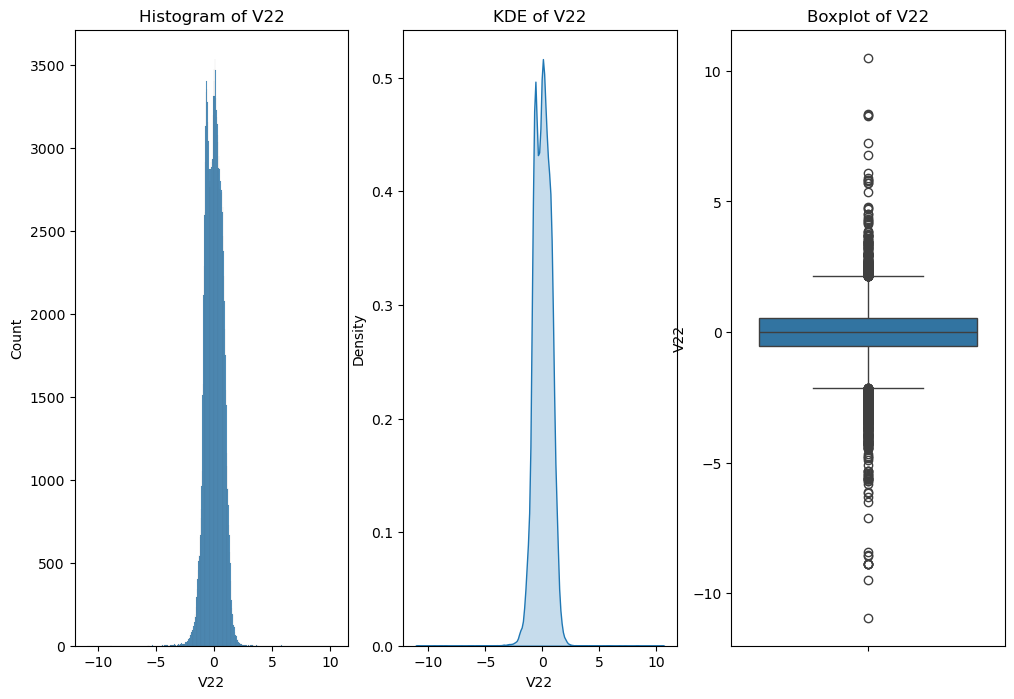

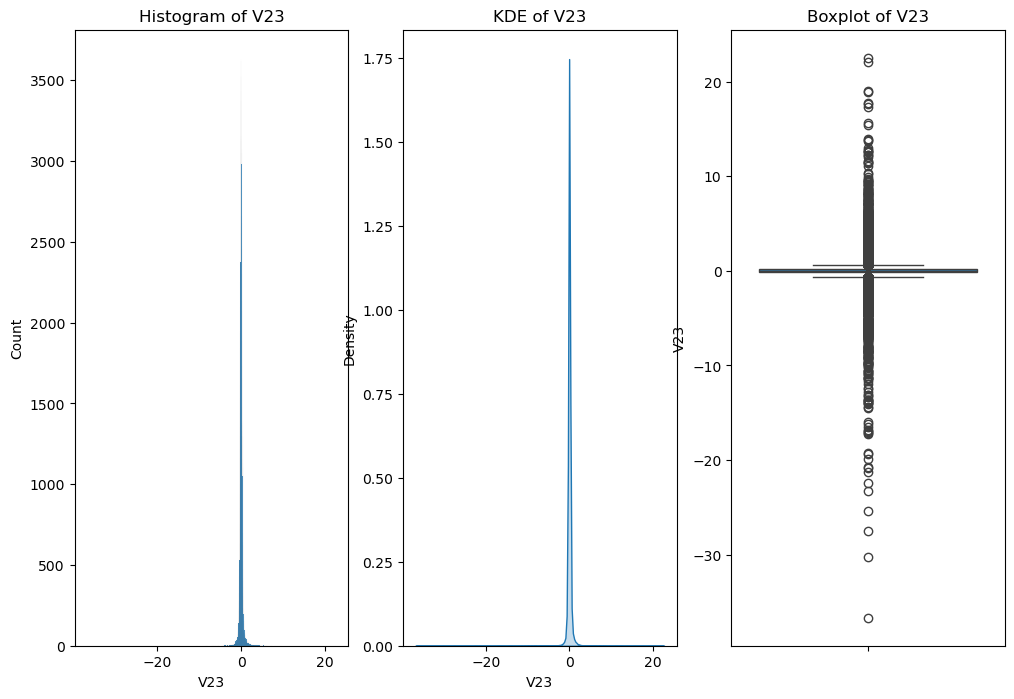

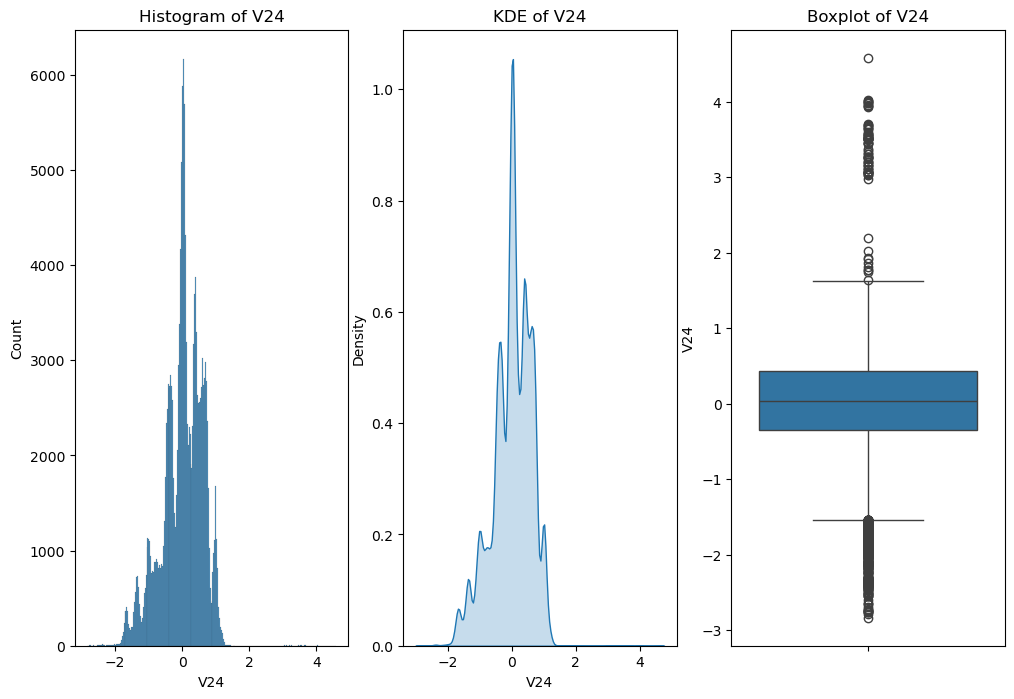

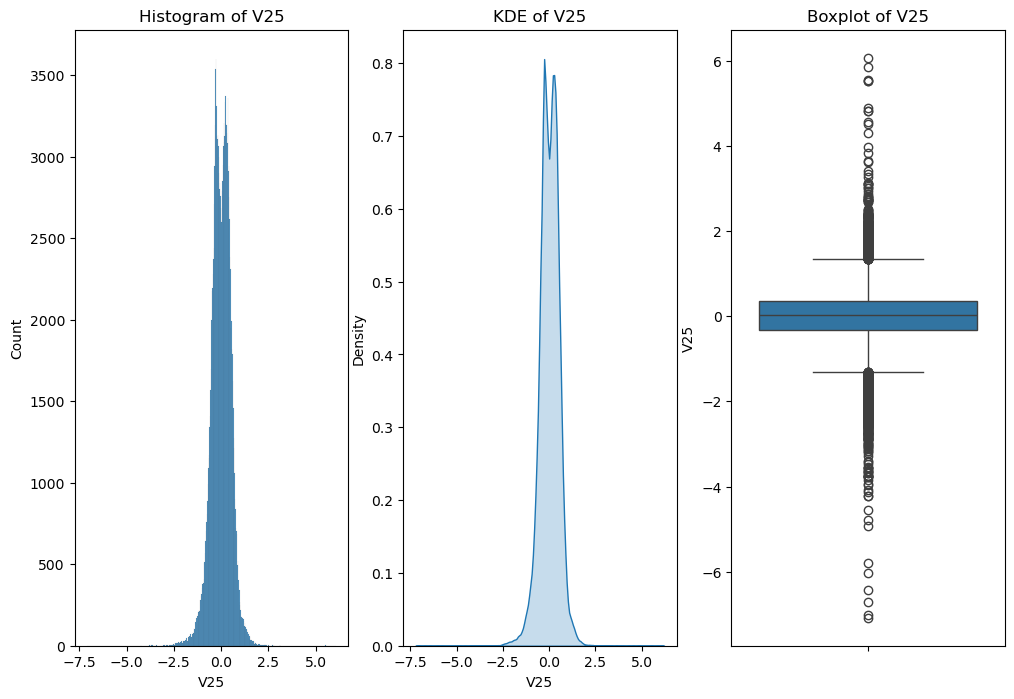

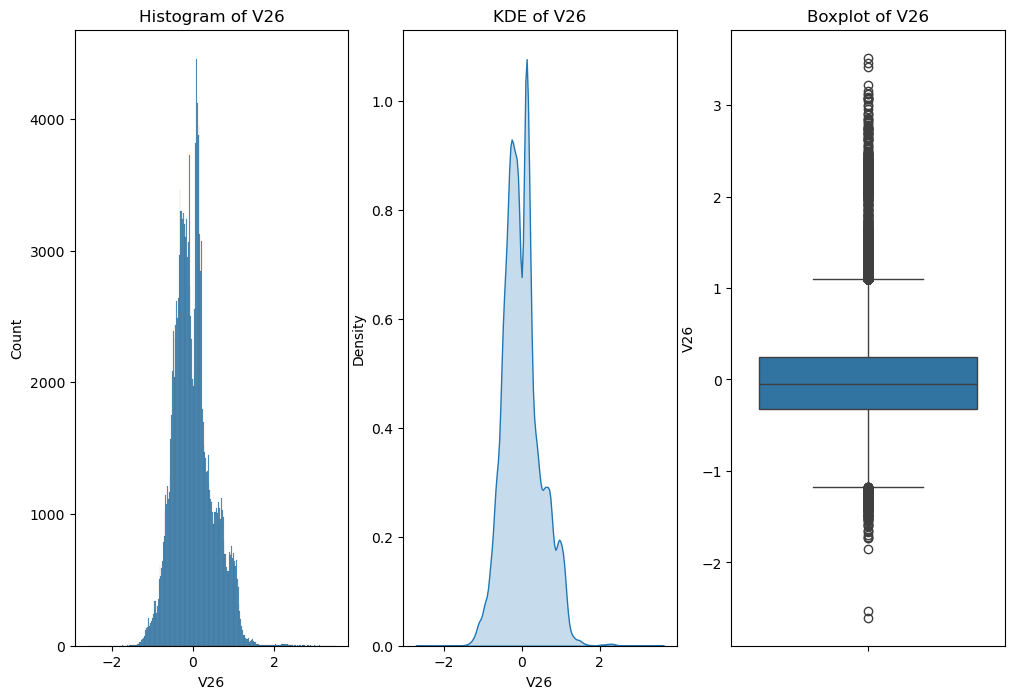

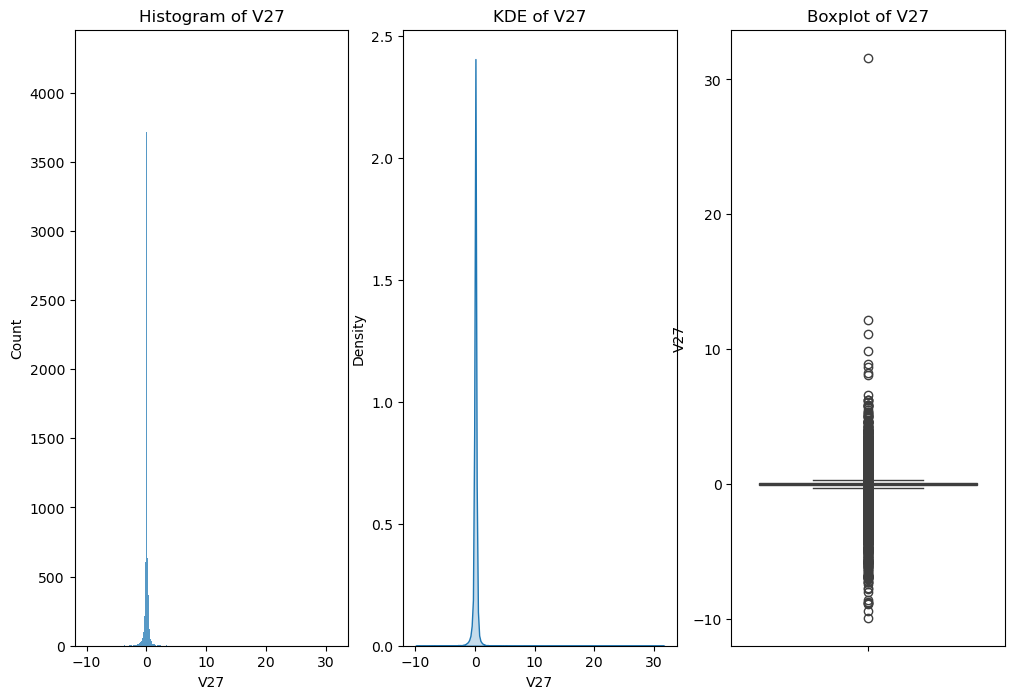

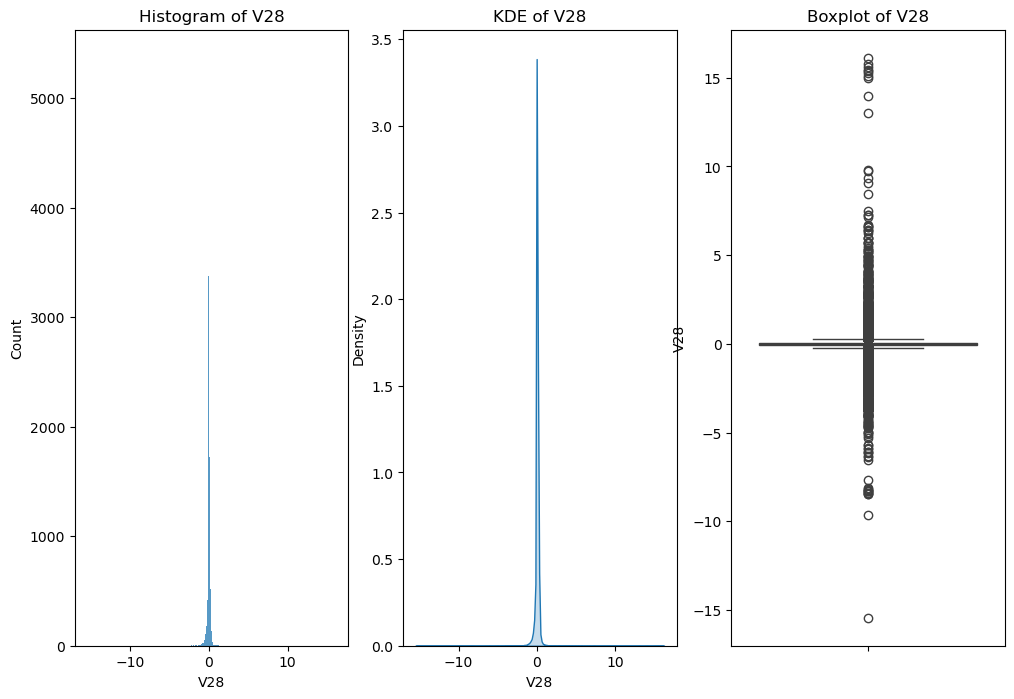

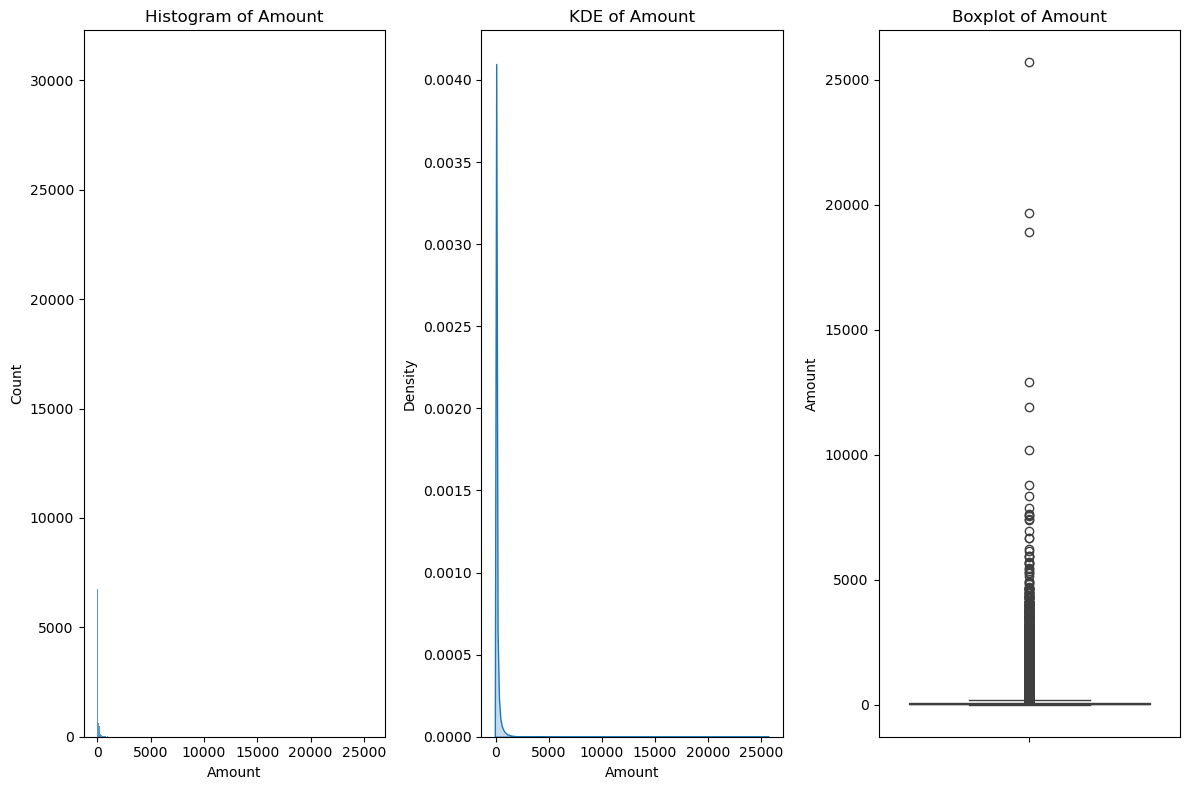

In [11]:

numerical_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

for i, column in enumerate(numerical_columns,1 ):
    plt.figure(figsize=(12, 8))
    plt.subplot(131)
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of {column}')

    plt.subplot(132)
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE of {column}')

    plt.subplot(133)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


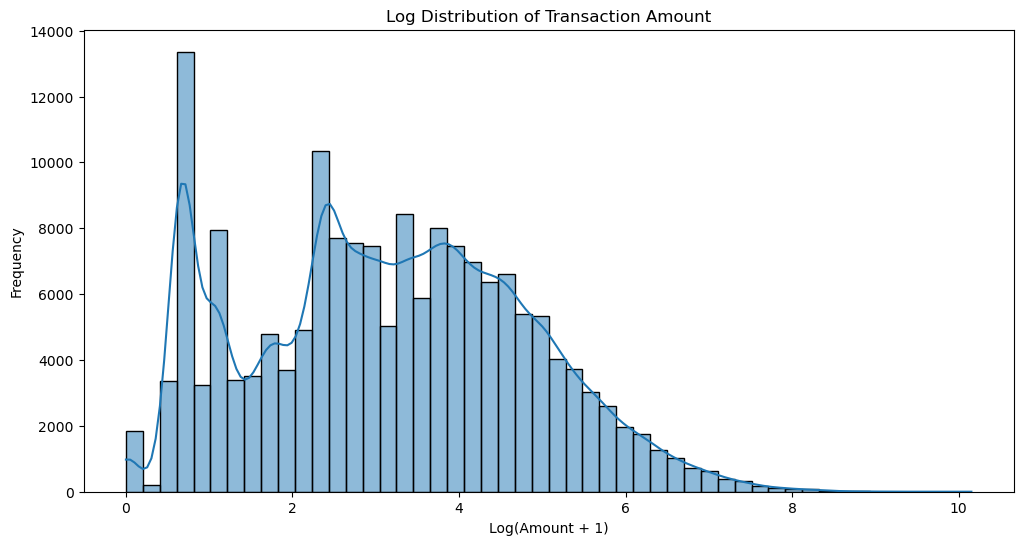

In [12]:
df['Log_Amount'] = np.log1p(df['Amount'])  
plt.figure(figsize=(12, 6))
sns.histplot(df['Log_Amount'], bins=50, kde=True)
plt.title('Log Distribution of Transaction Amount')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.show()

### Categorical features

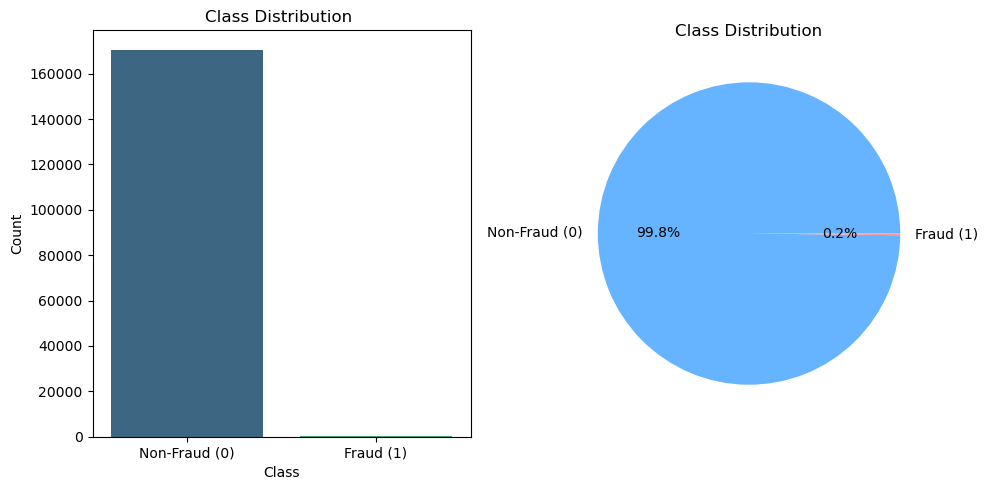

In [13]:

class_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])

plt.subplot(1, 2, 2)
plt.pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Class Distribution')


plt.tight_layout()
plt.show()

# Step 4: Features Relationships  <a id="step4"><a/>

 `Time` VS `Class`

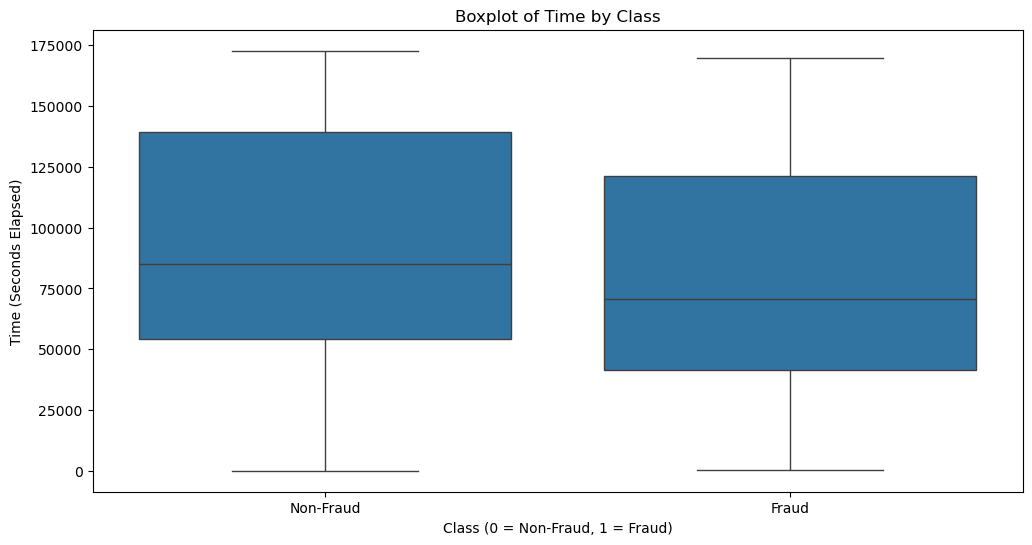

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Time', data=df)
plt.title('Boxplot of Time by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time (Seconds Elapsed)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

`Amount` VS `Class`

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 5: Conclusion and Insights  <a id="step5"><a/>

### Key Insights

1. **Class Imbalance**: The dataset reveals a significant imbalance between fraudulent and non-fraudulent transactions, necessitating techniques like oversampling or undersampling to improve model performance.

2. **Feature Distributions**: Several numerical features, particularly `Amount`, exhibit skewness and outliers, which could impact predictive modeling.

4. **Correlations**: The heatmap indicates that certain features have strong correlations with the target variable, highlighting potential predictors of fraud that should be prioritized in model training.

5. **Fraud Patterns**: Visualizations suggest identifiable patterns in fraudulent transactions, such as specific transaction amounts , which can inform targeted fraud detection strategies.
